# Uber Rides Data Analysis

###### *1. What are the main purposes for which people book Uber rides, and how do these purposes vary throughout different times of the day?*
###### *2. How does the distance of the rides affect the likelihood of booking for business versus personal purposes within the Uber rides data?*

## 1. Importing Libraries

In [1]:
# To begin our analysis, we need to import the necessary Python libraries that will facilitate data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing the Dataset

In [2]:
# Load the dataset
dataset = pd.read_csv("C:/Users/Abdel/Downloads/~ Data sets/Uber/UberDataset.csv")
# Display the first few rows of the data
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## 3. Understanding the Dataset

In [3]:
# Check the shape of the dataset
dataset.shape
# Returns the dimensions of the dataset

(1156, 7)

In [4]:
# Get information about the dataset
dataset.info()
# Provides a summary of the DataFrame including non-null counts and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## 4. Data Preprocessing

##### Data preprocessing is crucial for handling `"missing values"` and `"formatting data types"` correctly.

### 4.1 Handling Missing Values

##### Missing values can occur due to `"incomplete data collection"` or errors during `"data entry"`.

#### **Fill missing values in the `PURPOSE` column**:
   Missing values in this categorical column were replaced with the placeholder `"NOT"` to indicate the absence of a specified purpose.

In [5]:
   dataset['PURPOSE'] = dataset['PURPOSE'].fillna("NOT")

### 4.2 Converting Date Columns

In [6]:
# Convert date columns to datetime format so that further it can be use to do
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
									errors='coerce')

### 4.3 Creating New Time-Based Features

In [7]:
# Extract date and hour, categorize into day/night
from datetime import datetime

# Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

# Changing into categories of day and night
# Categorize time into Morning, Afternoon, Evening, Night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

### 4.4 Cleaning the Data

In [8]:
# Drop rows with null values
dataset.dropna(inplace=True)

In [9]:
# Drop duplicate rows
dataset.drop_duplicates(inplace=True)

In [10]:
# Remove outliers, if applicable
dataset = dataset[dataset['MILES'] < 100]  # Assume any rides longer than 100 miles are outliers

## 5. Data Visualization

##### Visualizing the data helps to uncover insights that may not be immediately apparent.

### 5.1 Unique Value Counts

In [11]:
# Check unique values in the object datatype columns
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values # Display unique counts for object columns

{'CATEGORY': 2, 'START': 105, 'STOP': 110, 'PURPOSE': 7, 'date': 112}

### 5.2 Count Plots

##### Use count plots to visualize the distribution of rides by 'CATEGORY' and 'PURPOSE.'

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175')])

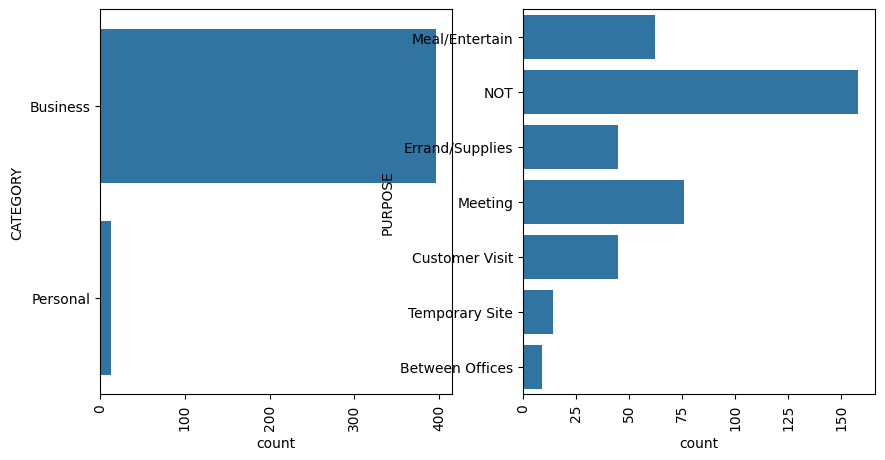

In [12]:
# Create count plots for CATEGORY and PURPOSE
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)

### 5.3 Insights from Count Plots

##### Determine insights based on the count plots that were generated.
- Most of the rides are booked for business purpose.
- Most of the people book cabs for Meetings and Meal / Entertain purpose.
- Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

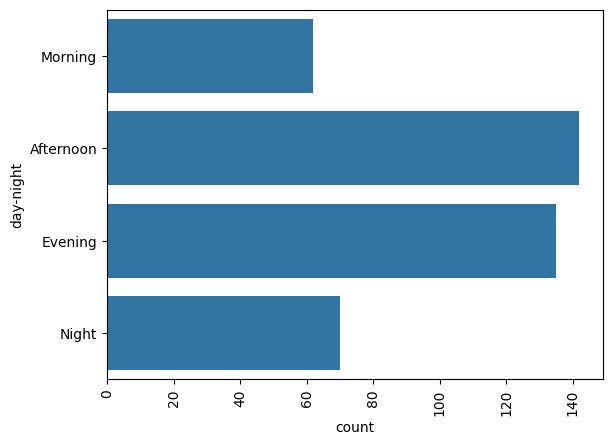

In [13]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

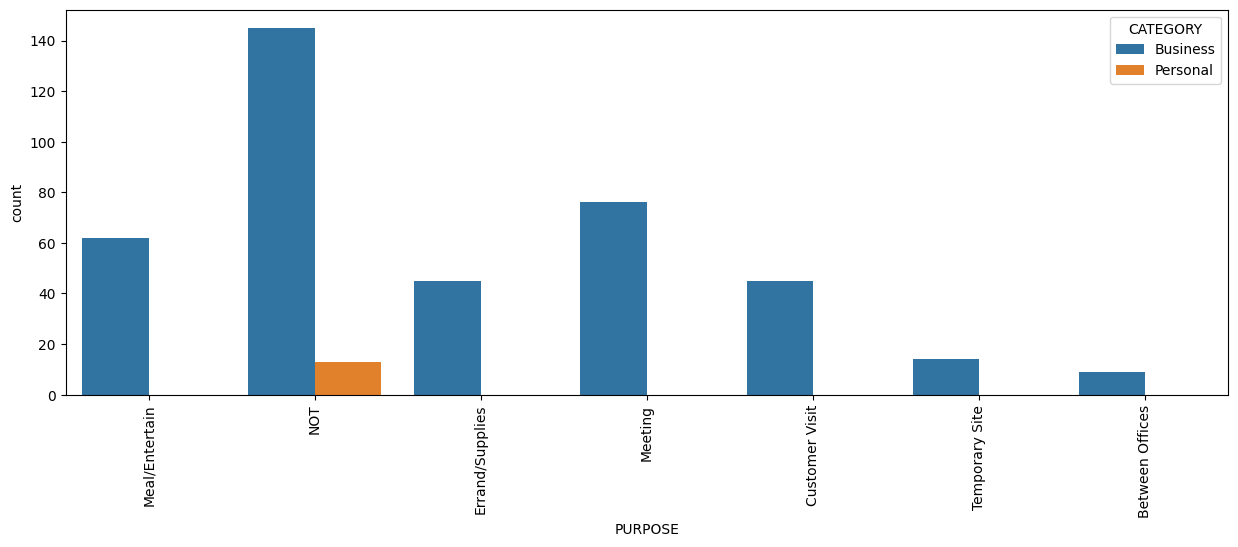

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()

df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

In [16]:
print(dataset.columns)

Index(['START_DATE', 'END_DATE', 'START', 'STOP', 'MILES', 'date', 'time',
       'day-night', 'CATEGORY_Business', 'CATEGORY_Personal',
       'PURPOSE_Between Offices', 'PURPOSE_Customer Visit',
       'PURPOSE_Errand/Supplies', 'PURPOSE_Meal/Entertain', 'PURPOSE_Meeting',
       'PURPOSE_NOT', 'PURPOSE_Temporary Site'],
      dtype='object')


In [17]:
import pandas as pd
dataset = pd.read_csv("C:/Users/Abdel/Downloads/~ Data sets/Uber/UberDataset.csv")

In [18]:
print(dataset[['CATEGORY', 'PURPOSE']].head())


   CATEGORY          PURPOSE
0  Business   Meal/Entertain
1  Business              NaN
2  Business  Errand/Supplies
3  Business          Meeting
4  Business   Customer Visit


In [19]:
# Check if the columns exist before proceeding
object_cols = ['CATEGORY', 'PURPOSE']
missing_cols = [col for col in object_cols if col not in dataset.columns]

if missing_cols:
    print(f"The following columns are missing: {missing_cols}")
else:
    # Proceed with OneHotEncoding
    OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
    OH_cols.index = dataset.index
    OH_cols.columns = OH_encoder.get_feature_names_out()
    
    df_final = dataset.drop(object_cols, axis=1)
    dataset = pd.concat([df_final, OH_cols], axis=1)

### 5.4 Correlation Heatmap

#### Insights from the heatmap:
- *Business* and *Personal Category* are **`highly negatively correlated`**, this have already proven earlier. So this plot, justifies the above conclusions.
- There is not much correlation between the features.

<Axes: >

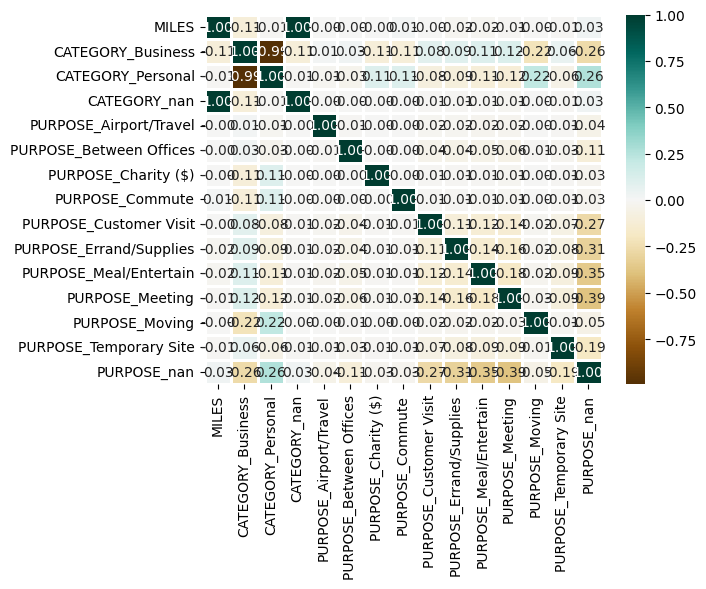

In [20]:
# We can now find the correlation between the columns using heatmap

# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

# Now you can create the heatmap
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

##### **Visualize the month data with value count**
###### *Insights from the plot:*
- *The counts are very irregular.*
- *Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.*

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

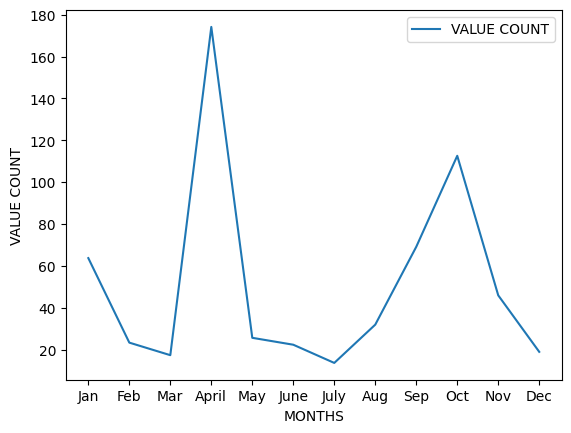

In [22]:
# Ensure START_DATE is a valid datetime column
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')

# Drop rows with invalid START_DATE
dataset = dataset.dropna(subset=['START_DATE'])

# Extract the month
dataset['MONTH'] = dataset['START_DATE'].dt.month

# Map months to labels
month_label = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April',
               5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
               9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dataset['MONTH'] = dataset['MONTH'].map(month_label)

# Analyze data
mon = dataset['MONTH'].value_counts(sort=False)
df = pd.DataFrame({
    "MONTHS": mon.index,
    "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES'].max()
})

# Plot
p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

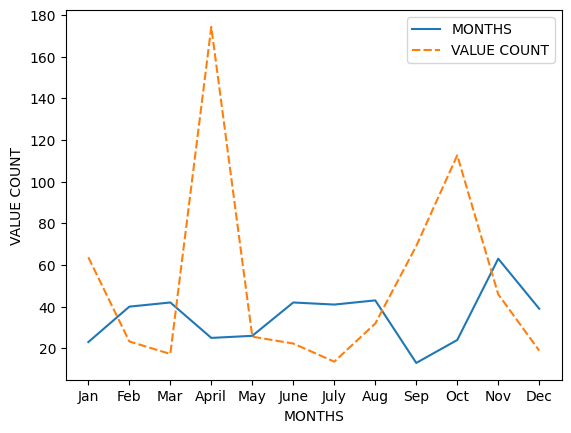

In [23]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": dataset.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [ ]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

In [ ]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [ ]:
sns.boxplot(dataset['MILES'])

In [ ]:
# As the graph is not clearly understandable. Let’s zoom in it for values less than 100.
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

In [ ]:
# to get more clarity we can use distplot for values less than 40.
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

In [ ]:
# to get more clarity we can use histplot for values less than 40.
sns.histplot(data=dataset[dataset['MILES'] < 40], x='MILES', kde=True)

##### **Insights from the above plots:**
- Most of the cabs booked for the distance of 4-5 miles.
- Majorly people chooses cabs for the distance of 0-20 miles.
- For distance more than 20 miles cab counts is nearly negligible.

## 6. Conclusion and Insights

### Conclusion
#### Overall, this analysis provides a comprehensive overview of Uber rides, highlighting significant trends in user behavior, time patterns, distance of travel, and correlations among features.
#### These insights deliver actionable recommendations that can enhance service delivery and operational efficiency.

### 6.1 Purpose of Rides

- **Predominant Purposes:** The analysis indicates that most Uber rides are booked for business purposes, with a significant proportion related to meetings and food (meals/entertainment). 
- **Distribution of Purposes:** The ride purposes vary significantly throughout the day, showing a peak in bookings during business hours, specifically from 10 AM to 5 PM.

### 6.2 Time-Based Patterns
- **Time of Day Influence:** The categorization of rides into Morning, Afternoon, Evening, and Night shows that most bookings occur in the Afternoon segment. 
- **Impact of Day of the Week:** Patterns across different days suggest that Uber bookings are more frequent on weekdays compared to weekends, which may correlate with business travel and work-related activities.

### 6.3 Distance Analysis
- **Ride Distances:** Most Uber rides are for short distances, typically ranging from 0 to 20 miles, with a noticeable concentration in the 4-5 mile range. 
- **Negligible Longer Rides:** The data shows that rides exceeding 20 miles constitute a small fraction of total bookings, implying that Uber is primarily utilized for short, urban trips.


### 6.4 Correlations and Relationships
- **Correlation Between Features:** The correlation heatmap reveals a strong negative correlation between the Business and Personal categories, indicating a distinct segmentation of ride purposes among users.
- **Limited Correlation Among Other Features:** There is little correlation seen among other numerical features, suggesting that factors influencing ride distance and frequency are varied and not strictly linked together.

### 6.5 Seasonal Trends
- **Monthly Trends:** Analysis of ride counts by month shows fluctuating trends, with lower counts noted during the winter months (November, December, January). This may reflect seasonal travel behavior or the effects of weather during these months.
- **Implications of Trends:** Understanding these seasonal fluctuations can assist in demand forecasting and operational planning for ride availability.

### 6.6 Summary of Insights
- **Strategic Focus Areas:** The data suggests that Uber's marketing strategies could focus more on business-oriented services during peak hours when demand is highest.
- **Operational Decisions:** Fleet management strategies may be adjusted based on insights regarding the most frequented ride purposes and peak times, ensuring adequate vehicle availability.
- **Further Research Opportunities:** Ongoing analysis of user feedback could enhance understanding of service effectiveness and areas for improvement in both the app and overall user experience.